In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Function to perform adaptive histogram equalization given an image and window size.

In [5]:
def adaptive_histogram_equalization(I, win_size):
    '''
    I - RGB image
    win_size - window size
    
    This function performs adaptive histogram equalization
    on the input image and returns the output image
    '''
    # Pad image
    p = int((win_size-1)/2)
    I_pad = np.pad(I, ((p,p),(p,p)), 'symmetric')
    
    # AHE
    I_op = np.zeros_like(I)
    for i in range (p,I_pad.shape[0]-p):
        for j in range (p,I_pad.shape[1]-p):
            
            window = I_pad[i-p:i+p+1,j-p:j+p+1]
            window = window < I_pad[i,j]
            rank = np.count_nonzero(window, axis = (0,1))
            I_op[i-p,j-p] = rank*255/(win_size*win_size)
            
    return I_op

Driver code to run on given image with different window sizes.

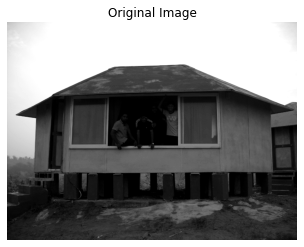

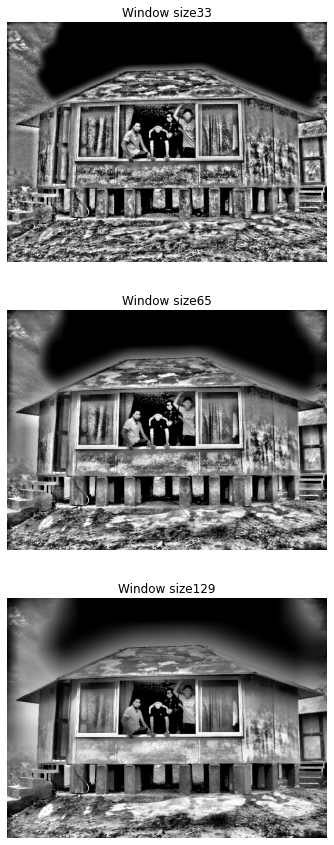

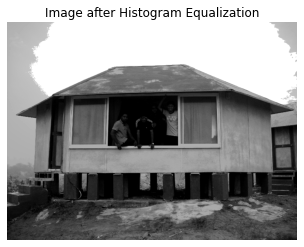

In [6]:
I = cv2.imread('/home/parth/work/UCSD/Fall 2021/ECE 253 Image Processing/Assignment 2/beach.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# plot original image
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.title.set_text('Original Image')
ax.imshow(I, cmap = 'gray')
plt.show()

window_size = [33,65,129]

fig = plt.figure(figsize=(15, 15))
for w in range(3):
    I_AHE = adaptive_histogram_equalization(I,window_size[w]);
    ax = fig.add_subplot(3,1,w+1)
    ax.axis('off')
    ax.title.set_text('Window size' + str(window_size[w]))
    ax.imshow(I_AHE, cmap = 'gray')
plt.show()

I_HE = cv2.equalizeHist(I)
# plot HE image
ax = plt.subplot(1,1,1)
ax.axis('off')
ax.title.set_text('Image after Histogram Equalization')
ax.imshow(I_HE, cmap = 'gray')
plt.show()

The image has better contrast after AHE and HE, making it easier to identify the 3 men in the darker part of the image.However, there are some artifacts introduced due to the image transformations applied. AHE leads to a better image in terms of identifying the object in dark areas (4 men) in comparision to HE.

Adaptive Histogram Equalization works better in case of beach.png, especially with a larger window size. Adaptive histogram equalization tends to be suited for images where the objective is to improve the localized contast value, as is the case for beach.png.\
Selecting AHE or HE would depend on the image and its histogram distribution or current state of contrast. HE would make more sense if the histogram contains a single narrow cluster where as AHE would be more suited for images with multiple clusters across the range of internsity values.